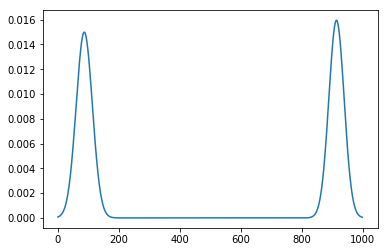

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import src.vvr_toolbox as t

mu_l, sig_l = 86.5, 26.6
mu_r, sig_r = 914.3, 25.0
x = np.arange(0,1000,1)

pdf_l = 1/(sig_l * np.sqrt(2 * np.pi)) * np.exp( - (x - mu_l)**2 / (2 * sig_l**2))
pdf_r = 1/(sig_r * np.sqrt(2 * np.pi)) * np.exp( - (x - mu_r)**2 / (2 * sig_r**2))

pdf = pdf_l + pdf_r

plt.plot(pdf)
# plt.show()

In [7]:
test = np.array([1,2,3,4,5])
print(test.shape)

(5,)


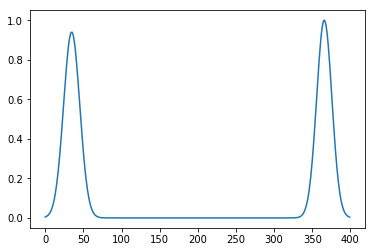

In [23]:
from scipy import signal
norm_pdf = t.get_pdf_x()
# x = np.arange(0, 1000, 1)
# xp = np.arange(0,1000,0.5)
# 
# pdf_scaled = np.interp(xp, x, norm_pdf)

pdf_scaled = signal.resample(norm_pdf, 400)

plt.plot(pdf_scaled)

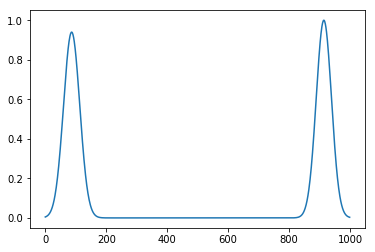

In [2]:
line_max = np.max(pdf)
norm_pdf = pdf/line_max
plt.plot(norm_pdf)

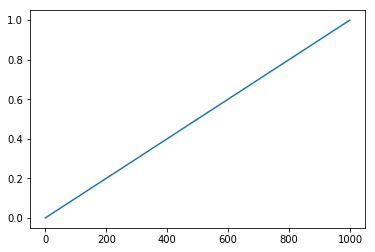

In [4]:
x2 = pdf/len(x)
plt.plot(x)

In [42]:
import json

json_file = '/Volumes/Zweiter/VVR/instances_val2014.json'

with open(json_file) as json_raw:
    jd = json.load(json_raw)

In [44]:
print(jd.keys())

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])


In [60]:
print(jd['images'][0])
print(jd['annotations'][10])

{'license': 3, 'file_name': 'COCO_val2014_000000391895.jpg', 'coco_url': 'http://mscoco.org/images/391895', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}
{'segmentation': [[289.74, 443.39, 302.29, 445.32, 308.09, 427.94, 310.02, 416.35, 304.23, 405.73, 300.14, 385.01, 298.23, 359.52, 295.04, 365.89, 282.3, 362.71, 275.29, 358.25, 277.2, 346.14, 280.39, 339.13, 284.85, 339.13, 291.22, 338.49, 293.77, 335.95, 295.04, 326.39, 297.59, 317.47, 289.94, 309.82, 287.4, 288.79, 286.12, 275.41, 284.21, 271.59, 279.11, 276.69, 275.93, 275.41, 272.1, 271.59, 274.01, 267.77, 275.93, 265.22, 277.84, 264.58, 282.3, 251.2, 293.77, 238.46, 307.79, 221.25, 314.79, 211.69, 325.63, 205.96, 338.37, 205.32, 347.29, 205.32, 353.03, 205.32, 361.31, 200.23, 367.95, 202.02, 372.27, 205.8, 382.52, 215.51, 388.46, 225.22, 399.25, 235.47, 399.25, 252.74, 390.08, 247.34, 386.84, 247.34, 388.46, 256.5

In [63]:
import pandas as pd

df = pd.DataFrame(jd['annotations'])

In [66]:
df2 = df[(df['image_id'] == 192 )]

In [67]:
print(df2)

               area                              bbox  category_id      id  \
235346  16061.32005   [349.48, 253.48, 131.6, 220.05]            1  478961   
236659  10907.63400   [437.21, 218.33, 78.41, 248.03]            1  530163   
236904   4428.93145     [0.93, 274.23, 36.53, 205.51]            1  541526   
236990  14388.17985  [268.11, 179.46, 111.35, 235.68]            1  545132   
239213    486.23700       [13.2, 381.39, 36.0, 92.98]           39  629871   

        image_id  iscrowd                                       segmentation  
235346       192        0  [[364.58, 473.53, 380.76, 413.12, 372.13, 390....  
236659       192        0  [[437.21, 289.42, 440.17, 278.95, 444.72, 272....  
236904       192        0  [[8.24, 274.23, 20.11, 279.71, 22.85, 286.11, ...  
236990       192        0  [[365.41, 392.43, 350.27, 391.35, 348.11, 406....  
239213       192        0  [[36.6, 455.78, 41.4, 469.57, 41.4, 473.77, 46...  
